<a href="https://colab.research.google.com/github/terarachang/ACCV_TinyGAN/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TinyGAN

## Set-up

In [1]:
!git clone https://github.com/terarachang/ACCV_TinyGAN

fatal: destination path 'ACCV_TinyGAN' already exists and is not an empty directory.


In [2]:
cd ACCV_TinyGAN

/content/ACCV_TinyGAN


In [3]:
import torch
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the trained generator

In [4]:
from model import Generator
G = Generator(image_size=128, conv_dim=32, z_dim=128, c_dim=128, repeat_num=5)

In [5]:
from utils import *
restore_model(30, 'gan/models', G, None, None, None)

The trained models from gan/models/model_30.tar are loaded !


In [6]:
G.to(device)
G.eval()

Generator(
  (embeding): Embedding(1000, 128)
  (fc): Linear(in_features=128, out_features=8192, bias=True)
  (blocks): Sequential(
    (0): GBlock(
      (dw_conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512)
      (dw_conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512)
      (pw_conv1): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
      (pw_conv2): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
      (c_sc): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
      (cbn0): CBN2d(
        (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        (embed): Linear(in_features=128, out_features=1024, bias=True)
      )
      (cbn1): CBN2d(
        (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        (embed): Linear(in_features=128, out_features=1024, bias=True)
      )
    )
    (1): GBlock(
      (dw_conv1): Conv2d(512, 512,

In [7]:
def print_network(model):
    """Print out the network information."""
    num_params = 0
    for p in model.parameters():
        num_params += p.numel()
    #print(model)
    print("The number of parameters: {:.1f} M, ({})".format(num_params/10**6, num_params))
    
print_network(G)

The number of parameters: 3.1 M, (3070659)


## Sample y, z

In [8]:
z_dim = 128
n_row = 5
n_samples = n_row * n_row
noise = torch.FloatTensor(truncated_normal(n_samples*z_dim)) \
										.view(n_samples, z_dim).to(device)

label = np.random.choice(398, n_row, replace=False) # sample from all animal classes
label = torch.tensor(label).repeat(n_row).to(device)
print(label.view(n_row, n_row))

tensor([[138, 126, 256,  42, 135],
        [138, 126, 256,  42, 135],
        [138, 126, 256,  42, 135],
        [138, 126, 256,  42, 135],
        [138, 126, 256,  42, 135]], device='cuda:0')


## G(y, z)

In [9]:
with torch.no_grad():
  out = G(noise, label).detach().cpu()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


# Save & Show the generated image

In [10]:
from torchvision.utils import save_image
save_image(denorm(out), 'demo.png', nrow=n_row)

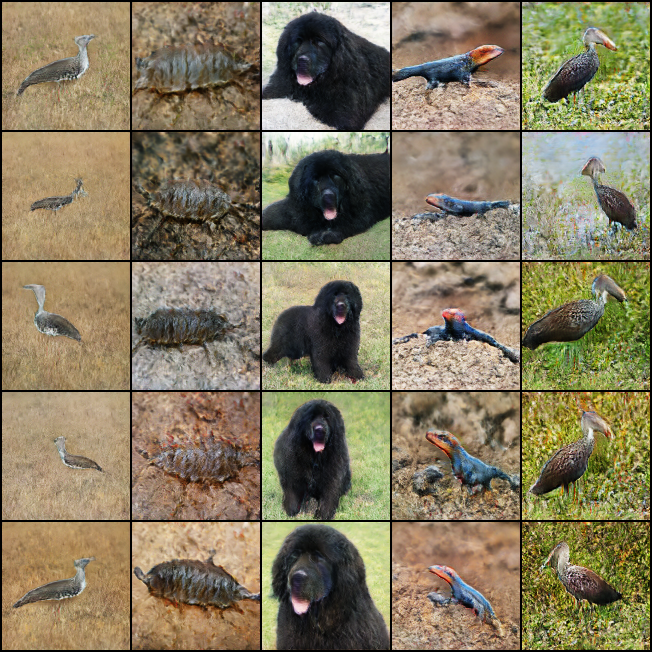

In [11]:
from IPython.display import Image
Image(filename='demo.png') 